In [1]:
import re
from bs4 import BeautifulSoup
import requests
import ssl

In [2]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
url = 'https://www.gutenberg.org/browse/scores/top'
# Send htt get request to retrieve the content
response = requests.get(url)

In [4]:
def status_webrequest(response):
    if response.status_code == 200:
        return 'The request is successful'
    else:
        return f"The request failed with status code: {response.status_code}"

In [5]:
status_webrequest(response)

'The request is successful'

In [6]:
# Decoding the response
decoded_content = response.content.decode(response.encoding)

# Parse the html content using BeautifulSoup
soup = BeautifulSoup(decoded_content, 'html.parser')

In [7]:
# Let's create and initialize and empty list to store the links
links = []

# Finding all <a> tags
for link in soup.find_all('a'):
    # Extracting the href attribute
    href = link.get('href')
    
    # Let's check if the href was found before adding to the list
    if href:
        # Append the hred to the links list
        links.append(href)

# Let's show the number of links found
print(len(links),'links were found')

675 links were found


In [8]:
# Printing the first 30 elements
print('First 30 links')
for i in range(30):
    print(links[i])

First 30 links
/
/about/
/about/
/policy/collection_development.html
/about/contact_information.html
/about/background/
/policy/permission.html
/policy/privacy_policy.html
/policy/terms_of_use.html
/ebooks/
/ebooks/
/ebooks/bookshelf/
/browse/scores/top
/ebooks/offline_catalogs.html
/help/
/help/
/help/copyright.html
/help/errata.html
/help/file_formats.html
/help/faq.html
/policy/
/help/public_domain_ebook_submission.html
/help/submitting_your_own_work.html
/help/mobile.html
/attic/
/donate/
/donate/
#books-last1
#authors-last1
#books-last7


In [9]:
booknumber = []

In [10]:
# Lets define the regular expression to find numeric digits
file_number_regex = r"\d+"  # Matches one or more digits

# The top 100 ebooks are from index 34 to 133
# Looping through the list
for link in links[34:134]:
    # Removing leading or trailing whitespace
    link = link.strip()

    # Finding all matches of numeric digits
    matches = re.findall(file_number_regex, link)

    if matches:
        # Combining all matches
        file_number = "".join(matches)
        # Adding the file number to the list
        booknumber.append(file_number)

In [11]:
# Let's print the file numbers
print(booknumber)

['1513', '2701', '84', '2641', '145', '100', '37106', '16389', '67979', '6761', '394', '4085', '2160', '6593', '1259', '5197', '11', '64317', '174', '98', '844', '5200', '345', '2554', '2542', '3543', '28054', '76', '46', '43', '73638', '2000', '25344', '1952', '1400', '73641', '1080', '1661', '74', '4300', '1727', '2591', '9380', '1260', '2600', '6130', '35899', '45368', '219', '73637', '1184', '1998', '27827', '5740', '73644', '30254', '768', '996', '16328', '73639', '45', '4363', '1232', '20228', '2814', '730', '600', '205', '67098', '16', '158', '514', '120', '8800', '2852', '408', '31284', '55', '3207', '2680', '244', '36', '31552', '1497', '8492', '135', '27558', '25717', '1250', '3825', '58585', '23700', '10676', '61', '33283', '73636', '7370', '1399', '73640', '1']


In [12]:
# Getting the content of the soup object
text_content = soup.text

# Printing the first 2000 characters
print(text_content[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-05-17402517
last 7 days3559806
last 30 days13610618



Top 100 EBooks yesterday


In [13]:
# Let's create an empty list to store the books name
books_name = []

In [14]:
# Creating a starting index that will point at "Top 100 EBooks yesterday"
# Getting the content of the soup object
text_content = soup.text
starting_index = text_content.splitlines().index('Top 100 EBooks yesterday')

In [15]:
# Loop 100 times to add next 100 lines (or less if fewer lines exist)
# The list of books start at + 11 index after the first "Top 100 EBooks yesterday"
for i in range(100):
    books_name.append(soup.text.splitlines()[starting_index + 11 + i])

# Let's check the size of the list books_name
len(books_name)

100

In [16]:
# Regular expression to extract text from the name string
books_name_regex = r"([A-Za-z]+(?:\s[A-Z]\.)?(?:\s[A-Za-z]+)*)"

# Initializing an empty list to store the titles
books_titles = []

# Loop through the list and apply the regex
for book in books_name:
    match = re.match(books_name_regex, book)
    if match:
        start, end = match.span()
        book_title = book[start:end]
        books_titles.append(book_title)

In [17]:
# Print the list of books
print('Top 100 eBooks from Gutenberg\n')

for i in range(len(books_titles)):
    print(books_titles[i])

Top 100 eBooks from Gutenberg

Romeo and Juliet by William Shakespeare
Moby Dick
Frankenstein
A Room with a View by E
Middlemarch by George Eliot
The Complete Works of William Shakespeare by William Shakespeare
Little Women
The Enchanted April by Elizabeth Von Arnim
The Blue Castle
The Adventures of Ferdinand Count Fathom
Cranford by Elizabeth Cleghorn Gaskell
The Adventures of Roderick Random by T
The Expedition of Humphry Clinker by T
History of Tom Jones
Twenty years after by Alexandre Dumas and Auguste Maquet
My Life
Alice
The Great Gatsby by F
The Picture of Dorian Gray by Oscar Wilde
A Tale of Two Cities by Charles Dickens
The Importance of Being Earnest
Metamorphosis by Franz Kafka
Dracula by Bram Stoker
Crime and Punishment by Fyodor Dostoyevsky
A Doll
Heartbreak House by Bernard Shaw
The Brothers Karamazov by Fyodor Dostoyevsky
Adventures of Huckleberry Finn by Mark Twain
A Christmas Carol in Prose
The Strange Case of Dr
The disciple by Paul Bourget
Don Quijote by Miguel de Ce

#### Assignment 2 ####

In [18]:
# Importing the librairies
import urllib.request, urllib.parse, urllib.error
import json

In [19]:
with open('dsc540_omdapi.json') as f:
    keys = json.load(f)
    myAPI = keys['myAPI']

In [20]:
# Assign the OMDB portal (http://www.omdbapi.com/?) as a string to a variable
link = 'http://www.omdbapi.com/?'

In [21]:
# Creating a variable apikey
apikey = '&apikey='+myAPI

In [22]:
def print_json(data):
    # List of the key in the json file
    keys = [
      "Title", "Year", "Rated", "Released", "Runtime", "Genre", "Director",
      "Writer", "Actors", "Plot", "Language", "Country", "Awards", "Ratings",
      "Metascore", "imdbRating", "imdbVotes", "imdbID", "Type", "DVD", "BoxOffice",
      "Production", "Website", "Response"
  ]
    # Print each key-value pair
    for key in keys:
        if key in data:
            print(f"{key}: {data[key]}")


In [23]:
# Function to download a poster
def download_poster(movie_data, save_dir="."):

    # Let's check if the data has a Poster key
    if "Poster" in movie_data:
        poster_url = movie_data["Poster"]

        # Displaying a message to say we are downloading the poster along with the url
        print(f"Downloading poster from: {poster_url}")

        # Let's extract the file name
        filename = poster_url.split("/")[-1]

        # Assigning the path to save_path
        save_path = f"{save_dir}/{filename}"

        # Display saving poster message
        print(f"Saving poster to: {save_path}")
    
    else:
        print("There is no url to download the poster from the data provided")

In [24]:
def search_movie(movie_name):
    try:
        # Let's construct the format of the url
        url = f"{link}{urllib.parse.urlencode({'t': movie_name})}{apikey}"
        
        # Displaying a progress message and the url we are using to download the movie data
        print(f'Retrieving data for "{movie_name}"')
        print(f'URL: {url}\n')

        # Downloading the movie data
        with urllib.request.urlopen(url) as response:
            movie_data = json.loads(response.read())

        # Checking if the response is successful
        if movie_data.get("Response") == "True":
            print("Movie Data:")
            print_json(movie_data)
            
            # Add a blank line
            print()

            # Downloading poster if available
            poster_url = movie_data.get("Poster", "N/A")
            
            if poster_url != "N/A":
                download_poster(movie_data)
            else:
                print("There is no poster available for this movie.\n")
        else:
            print(f"Error: {movie_data.get('Error', 'Unknown Error')}\n")

    except urllib.error.URLError as e:
        print(f"Error connecting to the movie database: {e}\n")

In [25]:
# Testing the function
search_movie("Titanic")

Retrieving data for "Titanic"
URL: http://www.omdbapi.com/?t=Titanic&apikey=3e78897f

Movie Data:
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,280,439
imdbID: tt0120338
Type: movie
DVD: 01 Jun 2014
BoxOffice: $674,292,608
Production: N/A
Website: N/A
Response: True

Saving poster to: ./MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg


In [26]:
# Testing the function
search_movie("Random_Error")

Retrieving data for "Random_Error"
URL: http://www.omdbapi.com/?t=Random_Error&apikey=3e78897f

Error: Movie not found!



#### Assignment 3

In [27]:
import requests

# Function to get the meal info from the api

def get_meal_info(meal_name):
    # url to get the api
    url = f"https://www.themealdb.com/api/json/v1/1/search.php?s={meal_name}"

    try:
        # Sending a GET request to the API
        response = requests.get(url)
        data = response.json()

        # Let's check if data contains the meal information
        if "meals" in data and data["meals"]:
            # Let's extract information we need from the api
            meal_info = {
                "Meal Name": data["meals"][0]["strMeal"],
                "Category": data["meals"][0]["strCategory"],
                "Area": data["meals"][0]["strArea"],
                "Instructions": data["meals"][0]["strInstructions"],
                "Ingredients": [data["meals"][0][f"strIngredient{i}"] for i in range(1, 21) if data["meals"][0][f"strIngredient{i}"]]
            }
            
            # Printing the meal information
            print("Meal Information:")
            print('******************')
            print(f"Meal Name: {meal_info['Meal Name']}")
            print(f"Category: {meal_info['Category']}")
            print(f"Area: {meal_info['Area']}")
            print(f"Instructions:\n{meal_info['Instructions']}")
            print("Ingredients:")
            for ingredient in meal_info["Ingredients"]:
                print(f"- {ingredient}")
        else:
            # Print a message if no info is available
            print(f"No information available for the meal: {meal_name}")

         # Handling errors 
    except Error as e:
        return f"There was an error: {e}"

In [28]:
# Testing the function
meal_name = 'Big Mac'
get_meal_info(meal_name)

Meal Information:
******************
Meal Name: Big Mac
Category: Beef
Area: American
Instructions:
For the Big Mac sauce, combine all the ingredients in a bowl, season with salt and chill until ready to use.
2. To make the patties, season the mince with salt and pepper and form into 4 balls using about 1/3 cup mince each. Place each onto a square of baking paper and flatten to form into four x 15cm circles. Heat oil in a large frypan over high heat. In 2 batches, cook beef patties for 1-2 minutes each side until lightly charred and cooked through. Remove from heat and keep warm. Repeat with remaining two patties.
3. Carefully slice each burger bun into three acrossways, then lightly toast.
4. To assemble the burgers, spread a little Big Mac sauce over the bottom base. Top with some chopped onion, shredded lettuce, slice of cheese, beef patty and some pickle slices. Top with the middle bun layer, and spread with more Big Mac sauce, onion, lettuce, pickles, beef patty and then finish wi

In [29]:
meal_name = 'Pasta'
get_meal_info(meal_name)

Meal Information:
******************
Meal Name: Mediterranean Pasta Salad
Category: Seafood
Area: Italian
Instructions:
Bring a large saucepan of salted water to the boil
Add the pasta, stir once and cook for about 10 minutes or as directed on the packet.
Meanwhile, wash the tomatoes and cut into quarters. Slice the olives. Wash the basil.
Put the tomatoes into a salad bowl and tear the basil leaves over them. Add a tablespoon of olive oil and mix.
When the pasta is ready, drain into a colander and run cold water over it to cool it quickly.
Toss the pasta into the salad bowl with the tomatoes and basil.
Add the sliced olives, drained mozzarella balls, and chunks of tuna. Mix well and let the salad rest for at least half an hour to allow the flavours to mingle.
Sprinkle the pasta with a generous grind of black pepper and drizzle with the remaining olive oil just before serving.
Ingredients:
- mozzarella balls
- baby plum tomatoes
- fresh basil
- farfalle
- extra virgin olive oil
- Green

In [30]:
meal_name = 'Random Meal'
get_meal_info(meal_name)

No information available for the meal: Random Meal


#### Assignment 4

In [31]:
# Importing the required librairies
import pandas as pd

# Link to the dataset
link = 'https://raw.githubusercontent.com/kueyram/DSC540/main/datasets/titanic.csv'
# Let's read the csv into a panda dataframe
titanic_data = pd.read_csv(link, sep = ',')

# Let's check the size of the dataframe
titanic_data.shape

(891, 12)

In [32]:
# Let's see the columns of the dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
# Let's view 10 random rows from the dataset
titanic_data.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q


In [34]:
# List of columns to remove
columns_remove = ('PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin')

# Remove columns
for column in columns_remove:
    titanic_data.drop(column ,  axis=1, inplace = True)

# Let's view 10 random rows from the dataset
titanic_data.sample(n=10)   

,Survived,Pclass,Sex,Age,Embarked
691,1,3,female,4.0,C
634,0,3,female,9.0,S
427,1,2,female,19.0,S
440,1,2,female,45.0,S
403,0,3,male,28.0,S
331,0,1,male,45.5,S
439,0,2,male,31.0,S
534,0,3,female,30.0,S
319,1,1,female,40.0,C
763,1,1,female,36.0,S


In [35]:
titanic_data.shape

(891, 5)

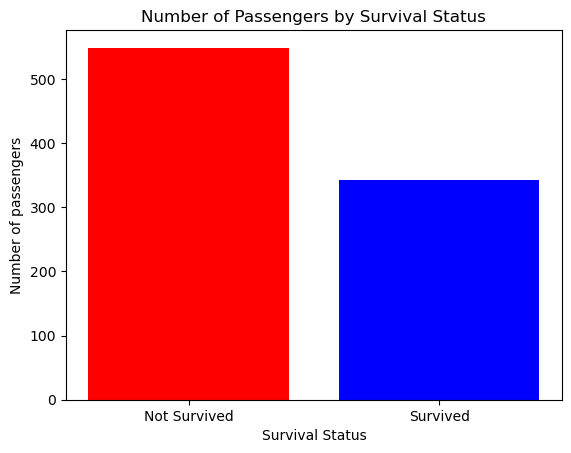

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's group by 'Survived' and count the number of occurences
survival_count = titanic_data['Survived'].value_counts()

# Plotting the bar chart
survival_count = titanic_data['Survived'].value_counts()
plt.bar(['Not Survived', 'Survived'], survival_count, color=['red', 'blue'])
plt.xlabel('Survival Status')
plt.ylabel('Number of passengers')
plt.title('Number of Passengers by Survival Status')
plt.show()


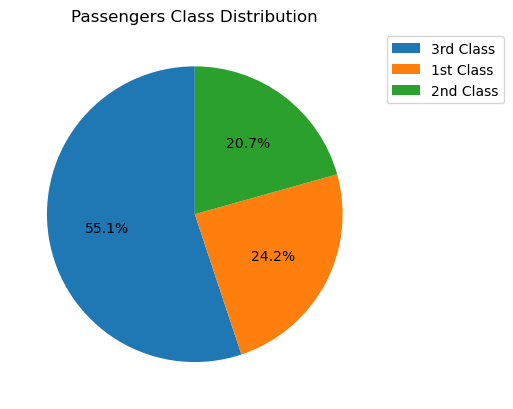

In [37]:
# Let's group the data by Pclass column and count
pclass_counts = titanic_data['Pclass'].value_counts()

# Let's map the class numbers to class names
class_names = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}

# Let's rename the classes for the plot
pclass_counts = pclass_counts.rename(class_names)

# Plotting the pie chart
plt.pie(pclass_counts, autopct='%1.1f%%', startangle=90, labels=None)

# Legend
plt.legend(pclass_counts.index, bbox_to_anchor=(1, 1))

# Adding a title to the plot
plt.title('Passengers Class Distribution')

# Showing the plot
plt.show()

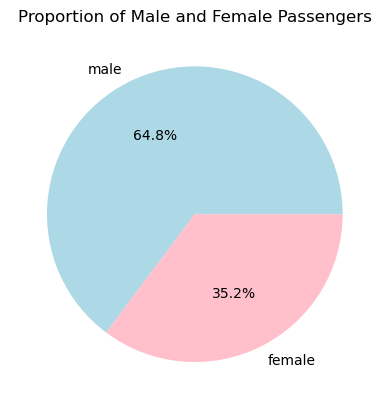

In [38]:
# Pie chart showing the proportion of male and female passengers

# Grouping by sex and counting the number of occurrences
gender_count = titanic_data['Sex'].value_counts()

# Plotting the chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])

# Adding a title
plt.title('Proportion of Male and Female Passengers')

# Showing the chart
plt.show()

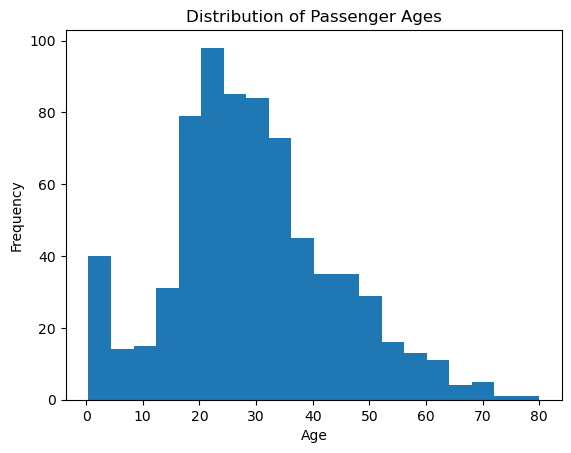

In [39]:
# Distribution of passenger ages
plt.hist(titanic_data['Age'].dropna(), bins=20)

# Adding x and y labels
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adding a title to the plot
plt.title('Distribution of Passenger Ages')
plt.show()